In [241]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


url = "https://raw.githubusercontent.com/rosinni/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [242]:
# --- Check for Missing Values ---
print("\n--- Missing Values per Column ---")
missing_values = data.isnull().sum()
print(missing_values)

# --- Check for Duplicate Rows ---
print("\n--- Number of Duplicate Rows ---")
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)


# To see the duplicate rows themselves:
print("\n--- Example Duplicate Rows ---")
print(data[data.duplicated(keep=False)].sort_values(by='fixed acidity').head()) # Shows all instances of duplicates


--- Missing Values per Column ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

--- Number of Duplicate Rows ---
240

--- Example Duplicate Rows ---
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2              0.34         0.00             1.8      0.050   
144             5.2              0.34         0.00             1.8      0.050   
131             5.6              0.50         0.09             2.3      0.049   
996             5.6              0.66         0.00             2.2      0.087   
1488            5.6              0.54         0.04             1.7      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
142   

In [243]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [244]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [245]:
print("\n--- Descriptive Statistics ---")
print(data.describe())


--- Descriptive Statistics ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.0120


--- Plotting Box Plots of Features vs. Quality ---


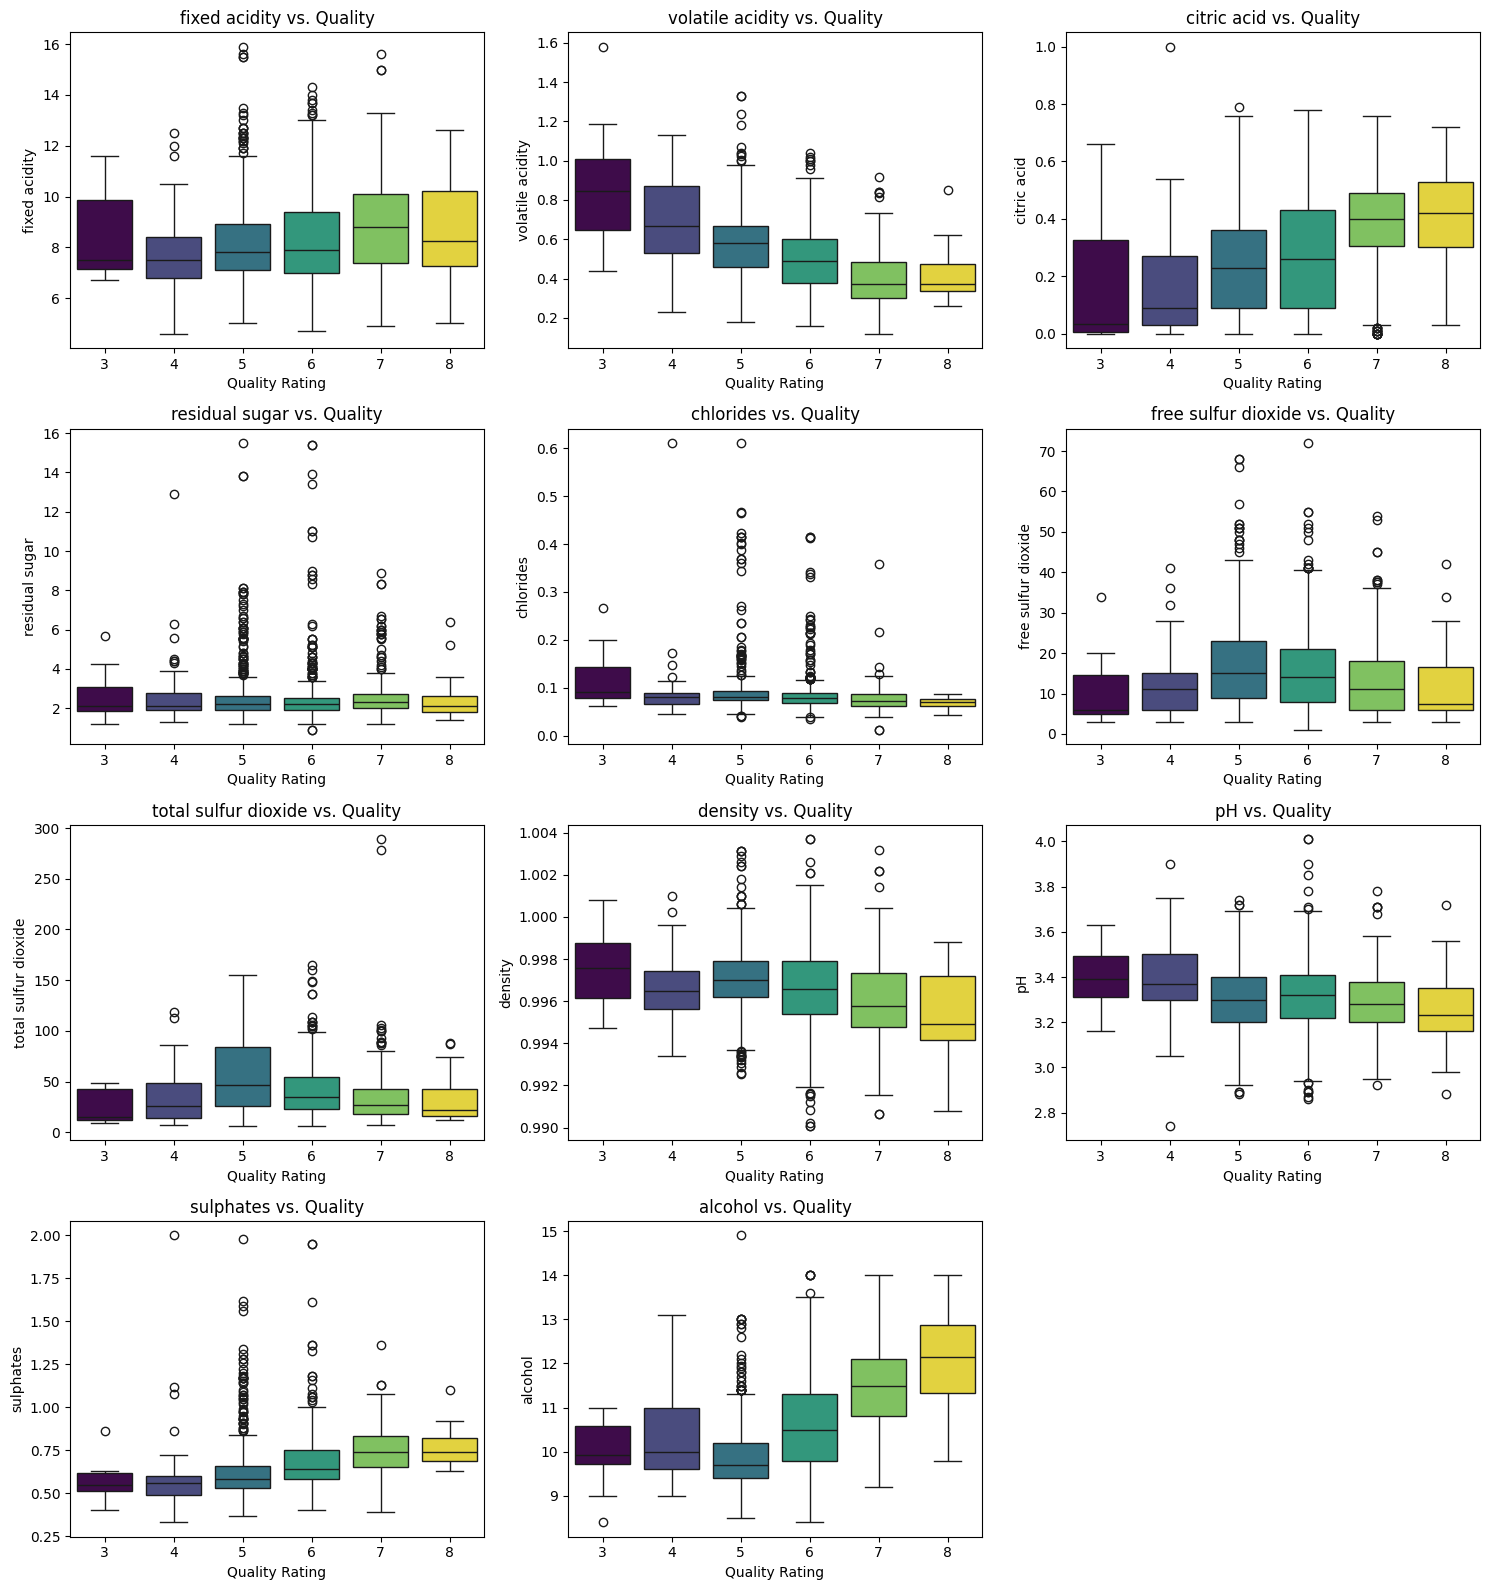

Box plots of features vs. Quality generated.


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Plotting Box Plots of Features vs. Quality ---")

# Select features to plot against quality
features_to_box_plot = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Determine grid size
n_cols = 3 # You can adjust the number of columns
n_rows = (len(features_to_box_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Create a box plot for each feature vs quality
for i, col in enumerate(features_to_box_plot):
    sns.boxplot(ax=axes[i], data=data, x='quality', y=col, hue='quality', palette='viridis', legend=False)
    axes[i].set_title(f'{col} vs. Quality')
    axes[i].set_xlabel('Quality Rating')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

print("Box plots of features vs. Quality generated.")




--- Plotting Specific Pairwise Scatter Plots, Colored by Quality ---


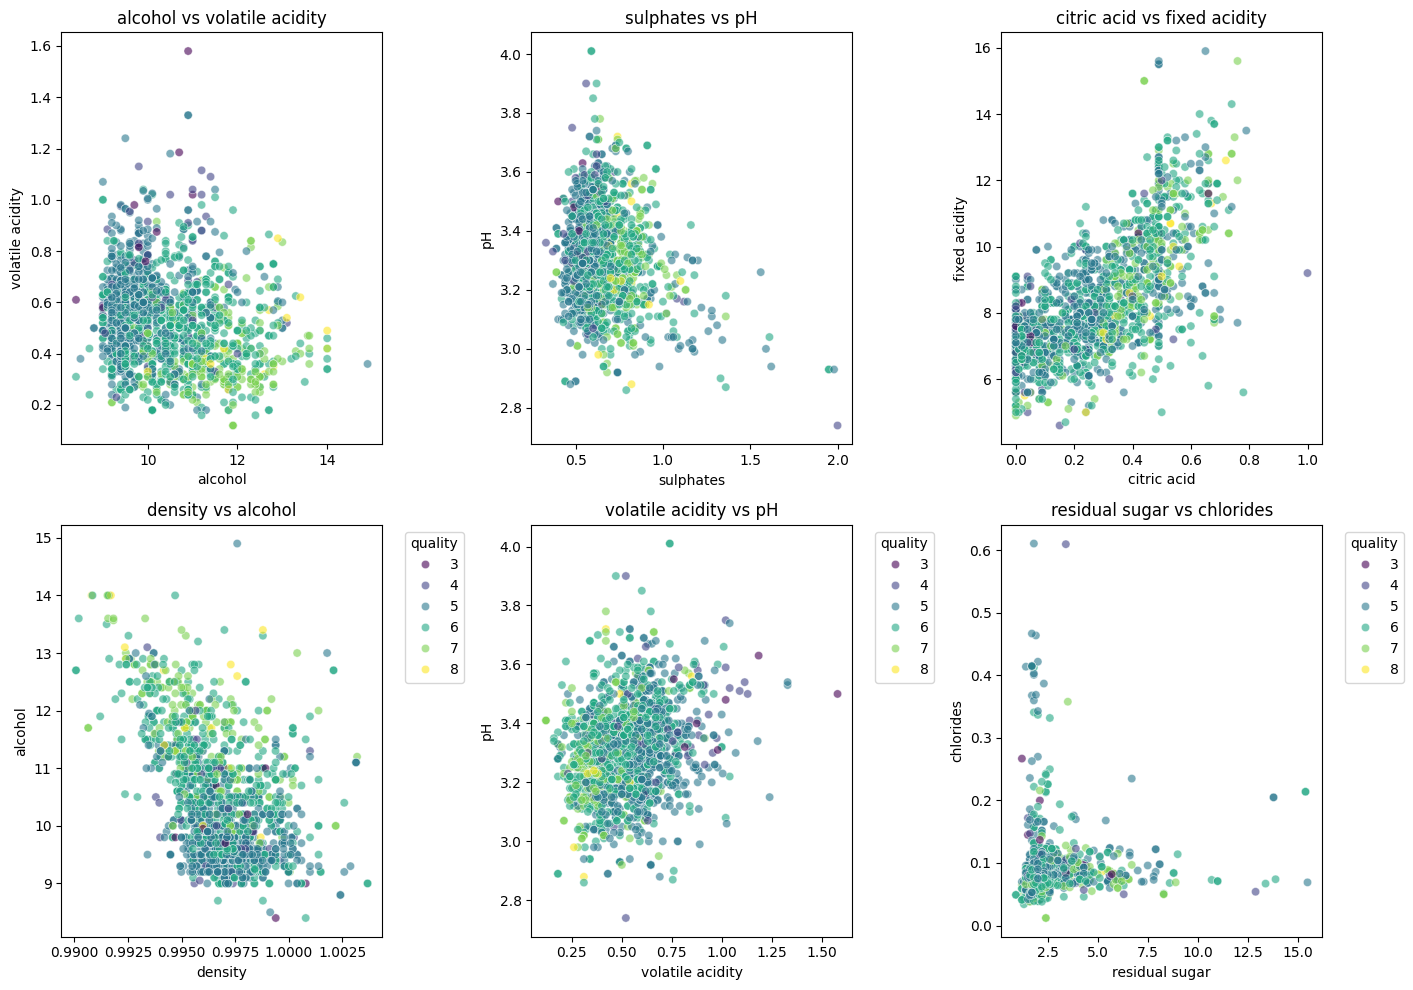

6 specific scatter plots generated, colored by quality.


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Plotting Specific Pairwise Scatter Plots, Colored by Quality ---")

specific_feature_pairs = [
    ('alcohol', 'volatile acidity'), 
    ('sulphates', 'pH'),             
    ('citric acid', 'fixed acidity'), 
    ('density', 'alcohol'),          
    ('volatile acidity', 'pH'),       
    ('residual sugar', 'chlorides')   
]

hue_variable = 'quality'


n_plots = len(specific_feature_pairs)
n_cols = 3 
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() 

# Create a scatter plot for each specific feature pair
for i, (x_col, y_col) in enumerate(specific_feature_pairs):
    if i < len(axes): 
        sns.scatterplot(ax=axes[i], data=data, x=x_col, y=y_col, hue=hue_variable, palette='viridis', alpha=0.6)
        axes[i].set_title(f'{x_col} vs {y_col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        
        if i >= len(specific_feature_pairs) - n_cols: 
             axes[i].legend(title=hue_variable, bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
             axes[i].legend().remove() # Remove redundant legends
    else:
        break # Stop if we run out of axes

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0, 0.95, 1]) 
plt.show() 

print(f"{n_plots} specific scatter plots generated, colored by quality.")



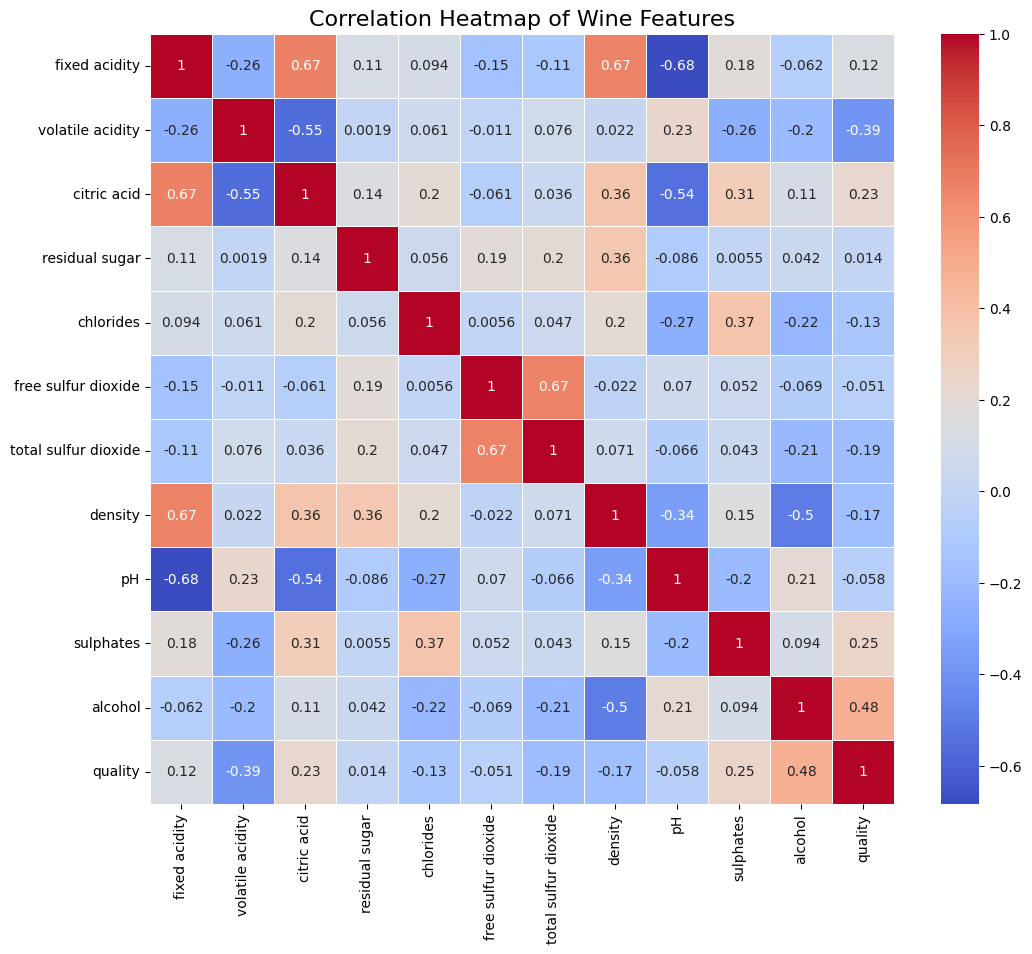

In [248]:
correlation_matrix = df.corr()

# 
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix,
            annot=True,      
            cmap='coolwarm', 
            linewidths=.5)   

plt.title('Correlation Heatmap of Wine Features', fontsize=16)
plt.show()

In [249]:
def quality_to_label(q):
    if q <= 4:
        return 0  # low
    elif q <= 6:
        return 1  # medium
    else:
        return 2  # high

df['label'] = df['quality'].apply(quality_to_label)


In [250]:
# 2. Separate independent variables (X) and the target variable (y)
X = df.drop(["label", "quality"], axis=1)
y = df["label"]

In [251]:
# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
# 4. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [253]:
# 5. Train the model with initial k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84375

Confusion Matrix:
 [[  0  11   0]
 [  1 250  11]
 [  0  27  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



In [254]:
# 6. Search for the best value of k
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_k_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_k_pred))

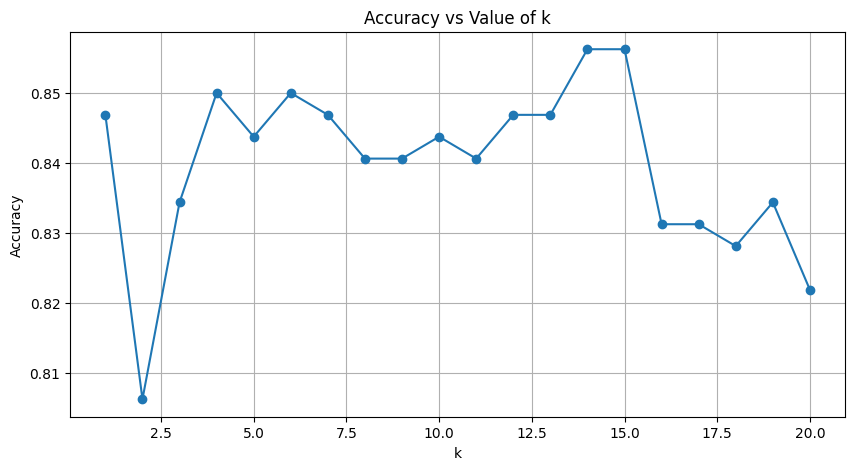

In [255]:
# 7. Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs Value of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [256]:
# 8. Choose the best k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best value of k: {best_k}")

Best value of k: 14


In [257]:
# 9. Train the final model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

In [258]:
# 10. Function to predict wine quality
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = final_knn.predict(features_scaled)[0]
    if pred == 0:
        return "This wine is likely of low quality"
    elif pred == 1:
        return "This wine is likely of medium quality"
    else:
        return "This wine is likely of high quality"

In [260]:
# 11. Test the prediction function with an example ---

example_features = [
        7.0, 0.5, 0.2, 2.0, 0.1, 
    15.0, 40.0, 0.995, 3.3, 0.7, 10.5
]

# Check if example_features length matches the number of features in X
if len(example_features) == X.shape[1]:
    result = predict_wine_quality(example_features)
    print("\n--- Example Prediction ---")
    print("Input Features:", example_features)
    print("Prediction:", result)
else:
    print(f"\nError: Example features length ({len(example_features)}) does not match "
          f"the number of features in training data ({X.shape[1]}).")


--- Example Prediction ---
Input Features: [7.0, 0.5, 0.2, 2.0, 0.1, 15.0, 40.0, 0.995, 3.3, 0.7, 10.5]
Prediction: This wine is likely of medium quality


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
